In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
from prophet import Prophet
import warnings

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

C:\Users\vaish\AppData\Roaming\Python\Python310\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
N = 0 # number of days for test split
pred_num = 60
i = 1800 # one example time series to train

In [4]:
all_data = pd.read_csv("C:/Users/vaish/Documents/train_1.csv").T
key = pd.read_csv("C:/Users/vaish/Documents/key_1.csv")

In [5]:
from operator import *

In [6]:

#Handle N/A
train= all_data
pages = train.iloc[:1]
train_cleaned = train.T.iloc[:,1:].fillna(method='ffill').T
dates=pd.Series(pd.date_range("01-01-2017","03-01-2017"))

In [7]:
#type(dates)
dates=dates.map(methodcaller('strftime', '%Y-%m-%d'))


In [8]:

submission_cols = ["page_date","Id","Visits"]
submission_1 = pd.DataFrame(columns=submission_cols)
submission_1=submission_1.set_index('page_date')
submission_1['page_date']=key['Page']
submission_1['Id']=key['Id']
data=train_cleaned.iloc[:,1].to_frame()

#print(len(data))

19:37:39 - cmdstanpy - INFO - Chain [1] start processing
19:37:40 - cmdstanpy - INFO - Chain [1] done processing


0
113.3639112235967


19:38:12 - cmdstanpy - INFO - Chain [1] start processing
19:38:12 - cmdstanpy - INFO - Chain [1] done processing


1
109.06737610045667


19:38:49 - cmdstanpy - INFO - Chain [1] start processing
19:38:49 - cmdstanpy - INFO - Chain [1] done processing
19:39:20 - cmdstanpy - INFO - Chain [1] start processing


2
131.46751857485947


19:39:20 - cmdstanpy - INFO - Chain [1] done processing
19:39:52 - cmdstanpy - INFO - Chain [1] start processing


3
96.94212232074092


19:39:52 - cmdstanpy - INFO - Chain [1] done processing
19:40:23 - cmdstanpy - INFO - Chain [1] start processing


4
129.28600378347866


19:40:23 - cmdstanpy - INFO - Chain [1] done processing
19:40:53 - cmdstanpy - INFO - Chain [1] start processing
19:40:53 - cmdstanpy - INFO - Chain [1] done processing


5
74.86895601362222


19:41:24 - cmdstanpy - INFO - Chain [1] start processing


6
96.30781462182404


19:41:24 - cmdstanpy - INFO - Chain [1] done processing
19:41:56 - cmdstanpy - INFO - Chain [1] start processing


7
127.43644763712787


19:41:57 - cmdstanpy - INFO - Chain [1] done processing
19:42:24 - cmdstanpy - INFO - Chain [1] start processing
19:42:24 - cmdstanpy - INFO - Chain [1] done processing


8
52.84973524621691


19:42:54 - cmdstanpy - INFO - Chain [1] start processing


9
37.683587668780454


19:42:54 - cmdstanpy - INFO - Chain [1] done processing
19:43:25 - cmdstanpy - INFO - Chain [1] start processing
19:43:25 - cmdstanpy - INFO - Chain [1] done processing


10
148.3736422046746


19:43:56 - cmdstanpy - INFO - Chain [1] start processing
19:43:57 - cmdstanpy - INFO - Chain [1] done processing


11
98.99373661781861


19:44:26 - cmdstanpy - INFO - Chain [1] start processing
19:44:26 - cmdstanpy - INFO - Chain [1] done processing


12
91.74764230559411


19:44:57 - cmdstanpy - INFO - Chain [1] start processing


13
127.48069298753848


19:44:57 - cmdstanpy - INFO - Chain [1] done processing
19:45:27 - cmdstanpy - INFO - Chain [1] start processing


14
66.01564258916201


19:45:27 - cmdstanpy - INFO - Chain [1] done processing
19:45:57 - cmdstanpy - INFO - Chain [1] start processing
19:45:57 - cmdstanpy - INFO - Chain [1] done processing


15
103.62130190271452


19:46:27 - cmdstanpy - INFO - Chain [1] start processing


16
148.80239291102347


19:46:27 - cmdstanpy - INFO - Chain [1] done processing
19:46:57 - cmdstanpy - INFO - Chain [1] start processing
19:46:57 - cmdstanpy - INFO - Chain [1] done processing


17
58.46698207354438


19:47:26 - cmdstanpy - INFO - Chain [1] start processing
19:47:26 - cmdstanpy - INFO - Chain [1] done processing


18
136.63666888206606
19
140.87180805053387
                     Id Visits  \
page_date                        
0          bf4edcf969af    NaN   
1          929ed2bf52b9    NaN   
2          ff29d0f51d5c    NaN   
3          e98873359be6    NaN   
4          fa012434263a    NaN   
...                 ...    ...   
8703775    f69747f5ee68    NaN   
8703776    2489963dc503    NaN   
8703777    b0624c909f4c    NaN   
8703778    24a1dfb06c10    NaN   
8703779    add681d54216    NaN   

                                                   page_date  
page_date                                                     
0          !vote_en.wikipedia.org_all-access_all-agents_2...  
1          !vote_en.wikipedia.org_all-access_all-agents_2...  
2          !vote_en.wikipedia.org_all-access_all-agents_2...  
3          !vote_en.wikipedia.org_all-access_all-agents_2...  
4          !vote_en.wikipedia.org_all-access_all-agents_2...  
...                                                      ...  
8703775  

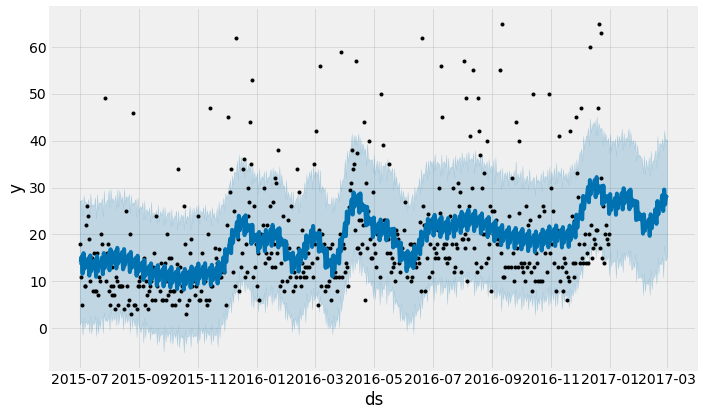

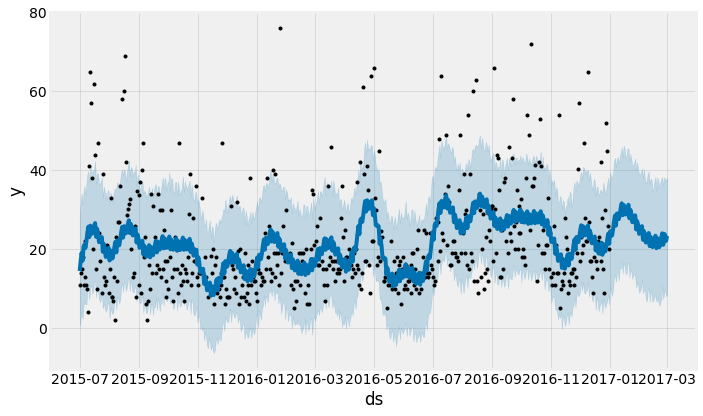

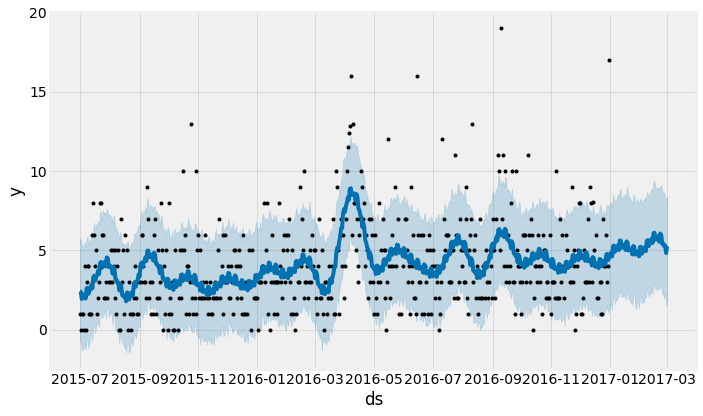

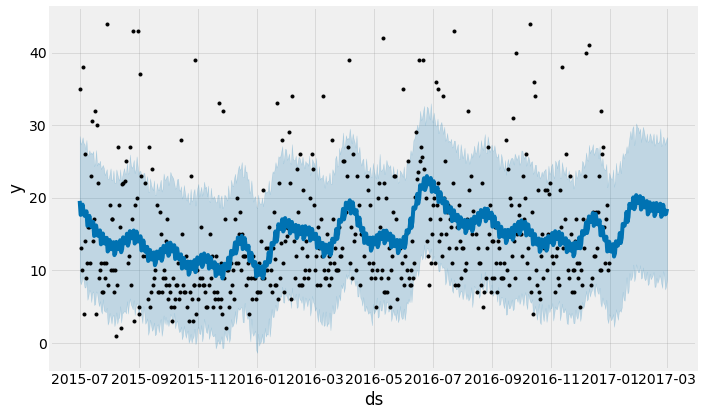

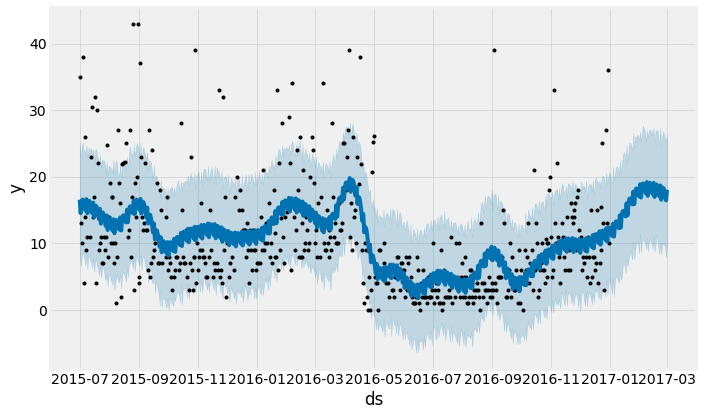

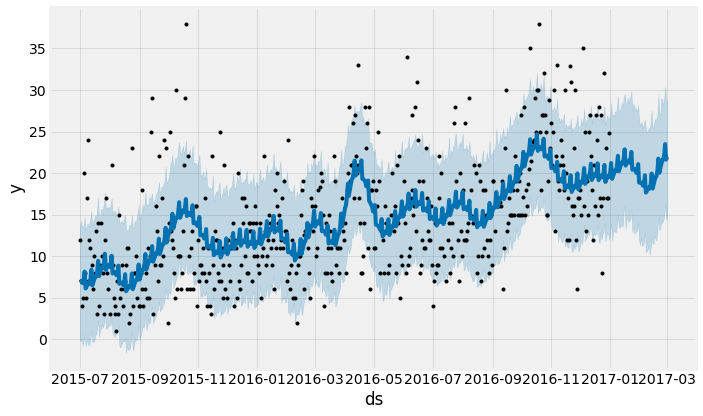

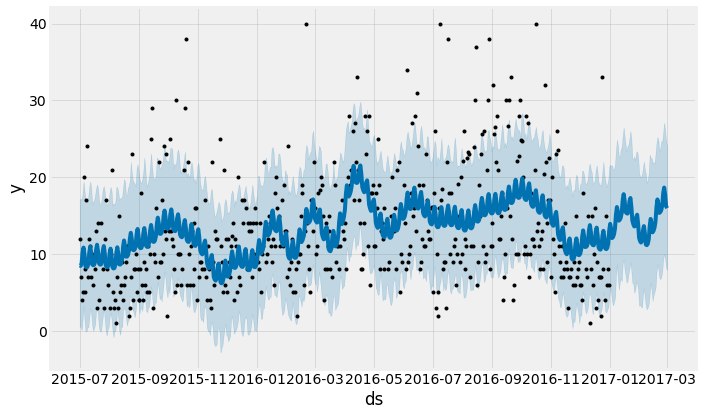

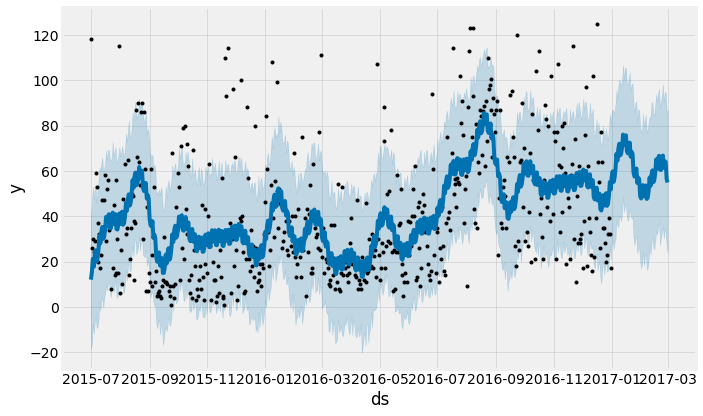

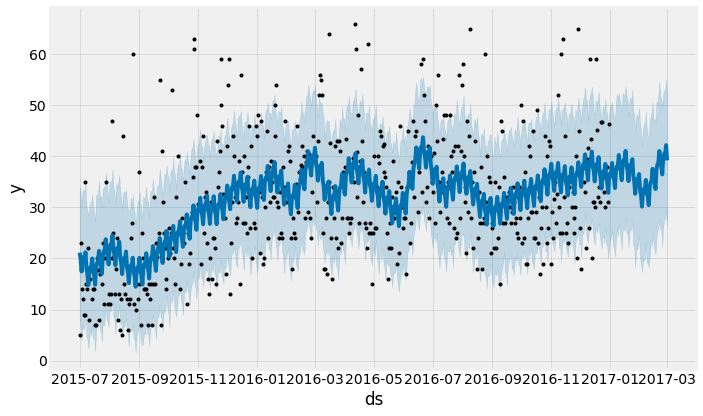

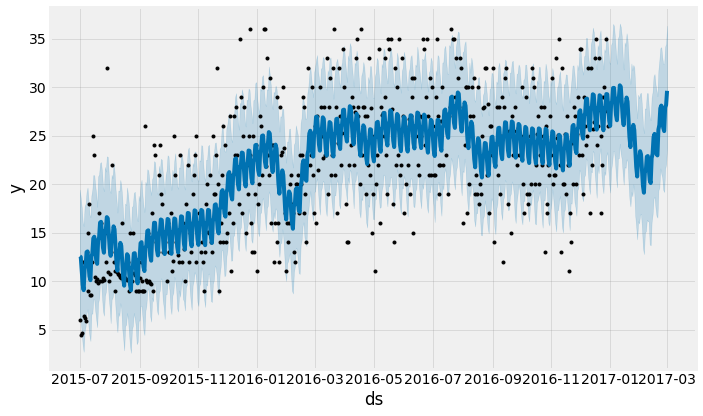

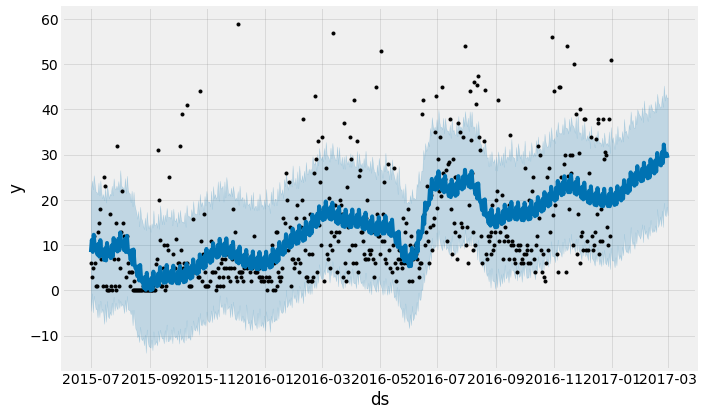

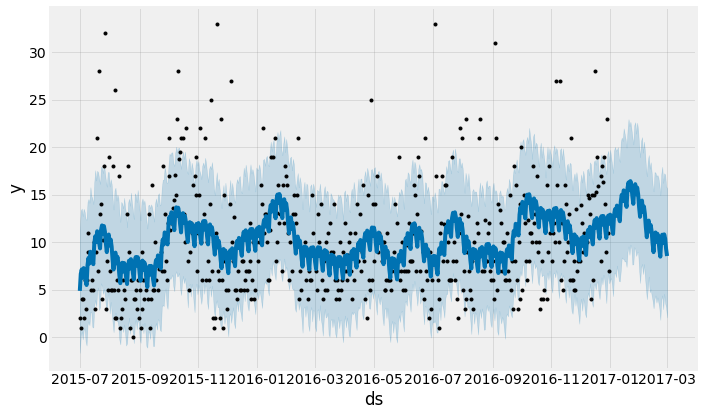

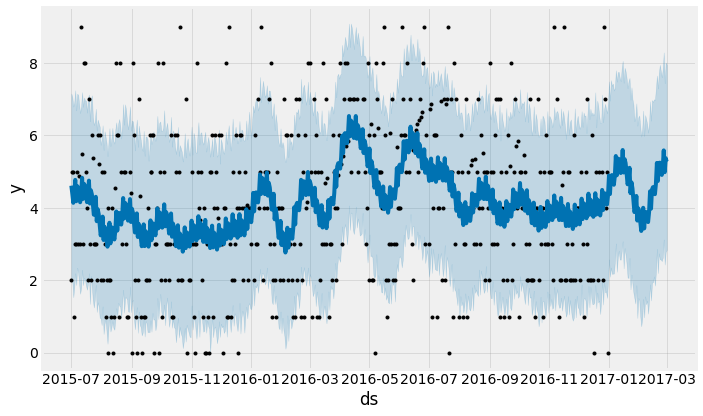

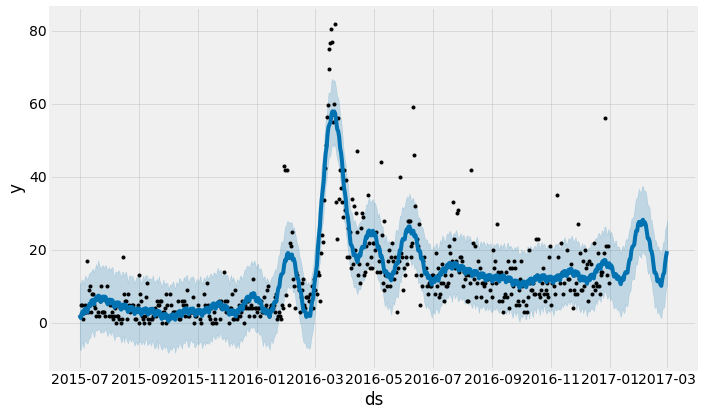

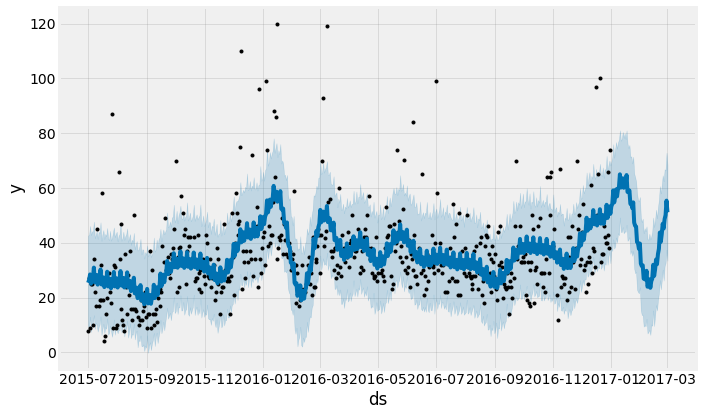

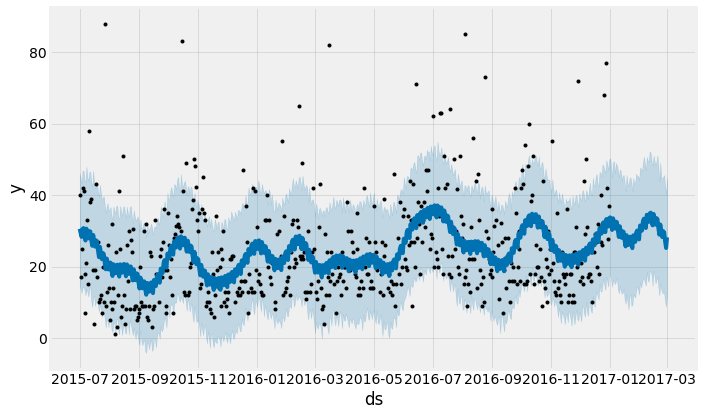

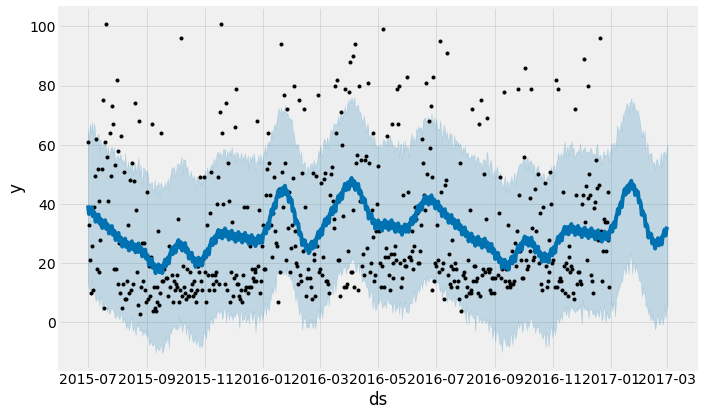

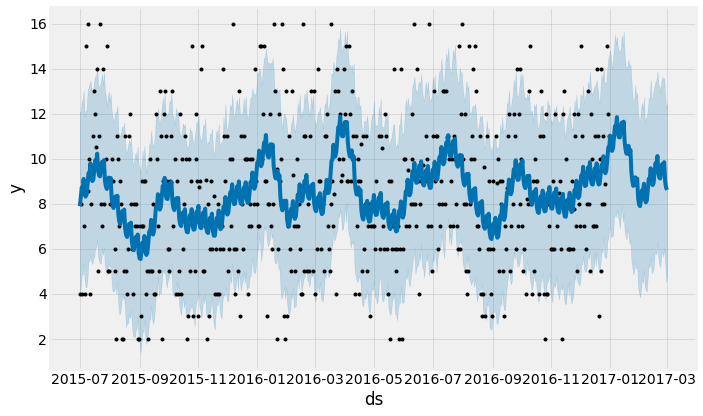

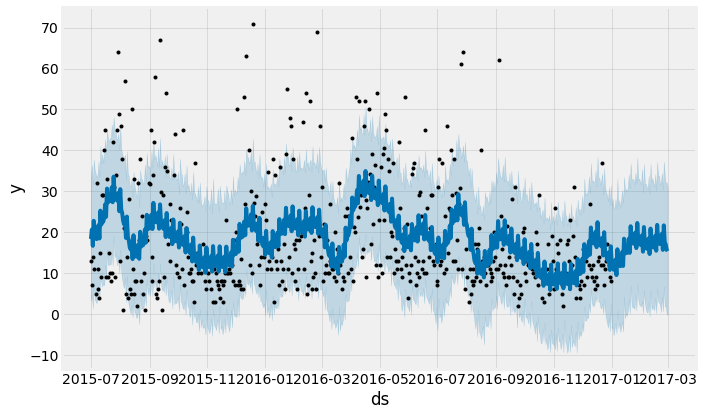

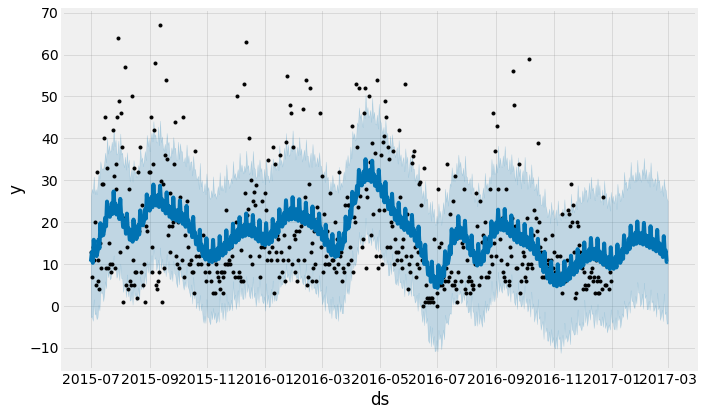

In [16]:
#fill outliers that are out of 1.5*std with rolling mean of 50 days

for i in range(20):
    data=train_cleaned.iloc[:,i].to_frame()
    data.columns = ['visits']
    with warnings.catch_warnings():
        warnings.filterwarnings('ignore')
    data['mean'] = data.visits.rolling(50,min_periods=1).mean()
    std_mult = 1.5
    data.loc[np.abs(data.visits-data.visits.mean())>=(std_mult*data.visits.std()),'visits'] = data.loc[np.abs(data.visits-data.visits.mean())>=(std_mult*data.visits.std()),'mean']
    data.index = pd.to_datetime(data.index)

    #print(data.tail())

    #prophet expects the folllwing label names
    X = pd.DataFrame(index=range(0,len(data)))
    X['ds'] = data.index
    X['y'] = data['visits'].values
    X.tail()
    
    #print(X)
    m = Prophet(yearly_seasonality=True)
    m.fit(X)
    future = m.make_future_dataframe(periods=pred_num)
    #future.tail()

    forecast = m.predict(future)
    forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()
    
    #print(forecast)
    
    m.plot(forecast)
    y_truth = train_cleaned.iloc[:,i].values
    y_forecasted = forecast.iloc[-N:,2].values
    y_forecasted_train = y_forecasted[:len(data)]
    #print(len(y_forecasted))
    #type(y_forecasted)
    for j in range(len(dates)):
        page_name = pages[i]["Page"]+"_"+dates[j]
        submission_1.loc[submission_1.page_date == page_name, 'Visits'] = y_forecasted[len(data)+j]
    print(i)    
        

    denominator = (np.abs(y_truth) + np.abs(y_forecasted_train))
    diff = np.abs(y_truth - y_forecasted_train) / denominator
    diff[denominator == 0] = 0.0
    print(200 * np.mean(diff))
print(submission_1)

In [9]:
submission_1.to_csv('S1.csv')